In [1]:
pip install lifelines pandas numpy seaborn


In [5]:
from lifelines.datasets import load_lung
import pandas as pd

# Load lung cancer dataset
df = load_lung()

# Display the first few rows of the dataset
print(df.tail())


     inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
223   1.0   188       0   77    1      1.0      80.0       60.0       NaN   
224  13.0   191       0   39    1      0.0      90.0       90.0    2350.0   
225  32.0   105       0   75    2      2.0      60.0       70.0    1025.0   
226   6.0   174       0   66    1      1.0      90.0      100.0    1075.0   
227  22.0   177       0   58    2      1.0      80.0       90.0    1060.0   

     wt.loss  
223      3.0  
224     -5.0  
225      5.0  
226      1.0  
227      0.0  


In [7]:
from lifelines.datasets import load_waltons

# Load the dataset
df_waltons = load_waltons()

# Display the first few rows
print(df_waltons.head())



      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


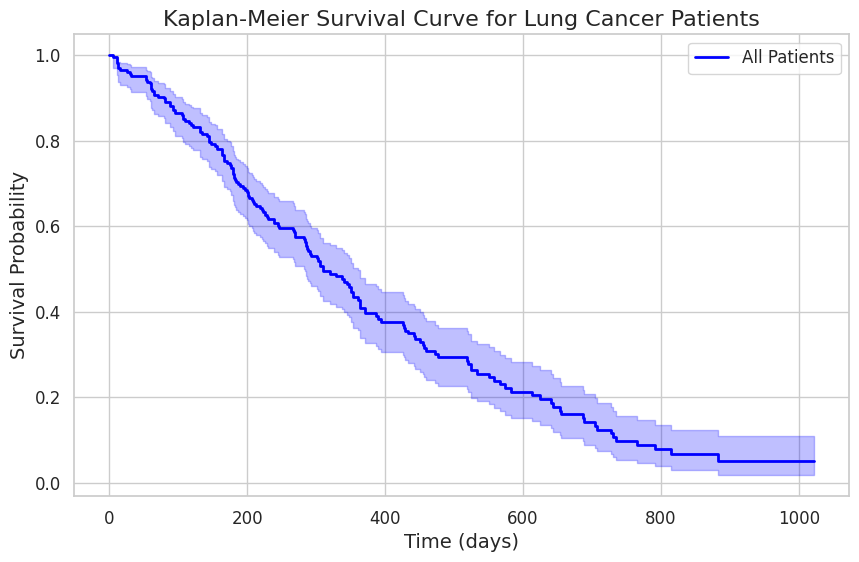

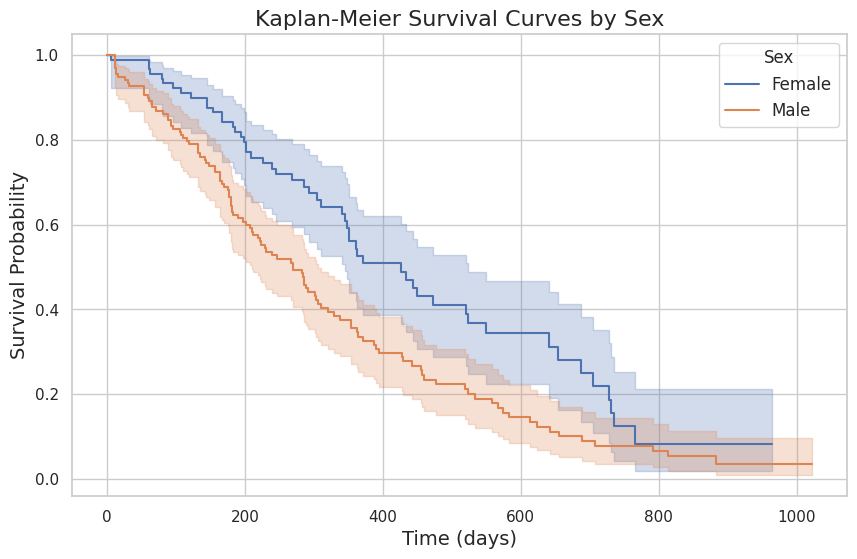

   test_statistic         p  -log2(p)
0       10.326742  0.001311  9.574936


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_lung
from lifelines.statistics import logrank_test

# Load the lung cancer dataset
df = load_lung()

# Adjust the 'status' column: 1 = event occurred (death), 0 = censored
df['event'] = df['status'].apply(lambda x: 1 if x == 1 else 0)

# Define duration and event columns
duration_col = 'time'
event_col = 'event'

# Map sex for readability
df['sex_label'] = df['sex'].map({1: 'Male', 2: 'Female'})

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the model to the entire dataset
kmf.fit(durations=df[duration_col], event_observed=df[event_col], label='All Patients')

# Plot the survival function
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
kmf.plot_survival_function(ci_show=True, color='blue', linewidth=2)

plt.title('Kaplan-Meier Survival Curve for Lung Cancer Patients', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Survival Probability', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

# Kaplan-Meier by Sex
plt.figure(figsize=(10, 6))

for sex, group_df in df.groupby('sex_label'):
    kmf = KaplanMeierFitter()
    kmf.fit(durations=group_df[duration_col], event_observed=group_df[event_col], label=sex)
    kmf.plot_survival_function(ci_show=True)

plt.title('Kaplan-Meier Survival Curves by Sex', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Survival Probability', fontsize=14)
plt.legend(title='Sex', fontsize=12)
plt.grid(True)
plt.show()

# Log-Rank Test between Male and Female
group_male = df[df['sex_label'] == 'Male']
group_female = df[df['sex_label'] == 'Female']

results = logrank_test(
    group_male[duration_col],
    group_female[duration_col],
    event_observed_A=group_male[event_col],
    event_observed_B=group_female[event_col]
)

print(results.summary)


   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
0   3.0   306       1   74    1      1.0      90.0      100.0    1175.0   
1   3.0   455       1   68    1      0.0      90.0       90.0    1225.0   
2   3.0  1010       0   56    1      0.0      90.0       90.0       NaN   
3   5.0   210       1   57    1      1.0      90.0       60.0    1150.0   
4   1.0   883       1   60    1      0.0     100.0       90.0       NaN   

   wt.loss  
0      NaN  
1     15.0  
2     15.0  
3     11.0  
4      0.0  


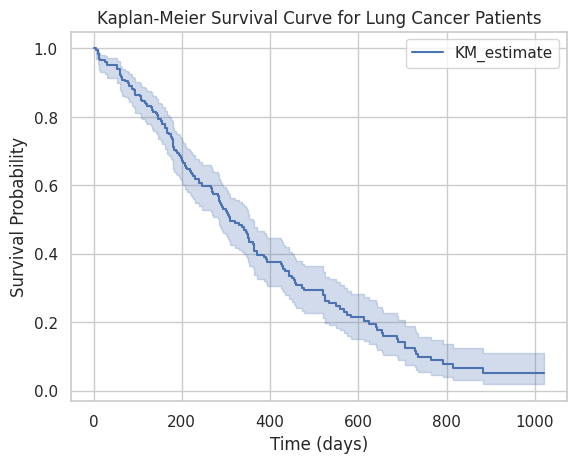

In [9]:
# Import necessary libraries
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the lung cancer dataset from lifelines
from lifelines.datasets import load_lung
df = load_lung()

# Display the first few rows of the dataset
print(df.head())

# Kaplan-Meier Estimator requires two columns: 'duration' and 'event observed'
# In the 'lung' dataset:
# - 'time' represents the duration in days
# - 'status' represents the event (1 = death, 0 = censored)

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the data into the model, assuming 'time' is the duration and 'status' is the event
kmf.fit(durations=df["time"], event_observed=df["status"])

# Plot the survival curve
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve for Lung Cancer Patients')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.show()


   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
0   3.0   306       1   74    1      1.0      90.0      100.0    1175.0   
1   3.0   455       1   68    1      0.0      90.0       90.0    1225.0   
2   3.0  1010       0   56    1      0.0      90.0       90.0       NaN   
3   5.0   210       1   57    1      1.0      90.0       60.0    1150.0   
4   1.0   883       1   60    1      0.0     100.0       90.0       NaN   

   wt.loss  
0      NaN  
1     15.0  
2     15.0  
3     11.0  
4      0.0  


<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -496.90
         time fit was run = 2024-09-02 06:28:59 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.58       0.20            -0.94            -0.16                 0.39                 0.86
ph.ecog     0.55       1.73       0.15             0.25             0.84                 1.29                 2.32
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  0.61   0.54       0.89
sex           0.00 -2.74   0.01       7.34
ph.ecog       0.00  3.64 <0.005      11.85
wt.loss       0.00 -1.52   0.13       2.96
---
Concordance = 0.64
Partial AIC = 1001.79
log-likelihood ratio test = 22.44 on 4 df
-log2(p) of ll-ratio test = 12.58

<Axes: xlabel='log(HR) (95% CI)'>

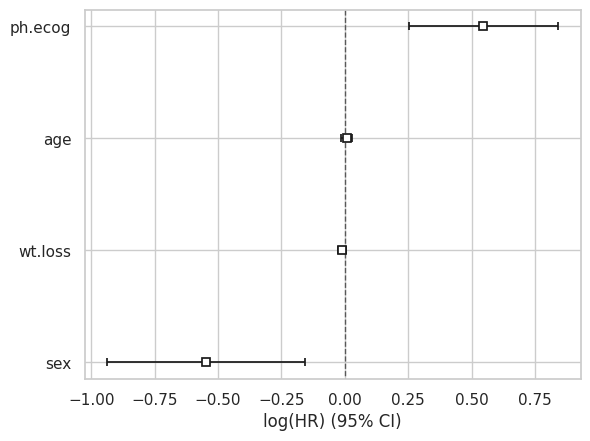

In [10]:
# Import necessary libraries
import pandas as pd
from lifelines import CoxPHFitter

# Load the lung cancer dataset from lifelines
from lifelines.datasets import load_lung
df = load_lung()

# Display the first few rows of the dataset
print(df.head())

# Drop rows with missing values for simplicity
df.dropna(inplace=True)

# Initialize the Cox Proportional Hazards model
cph = CoxPHFitter()

# Fit the model using the lung cancer dataset
# We will use 'time' as the duration, 'status' as the event, and other columns as covariates
cph.fit(df, duration_col='time', event_col='status', formula="age + sex + ph.ecog + wt.loss")

# Print the summary of the model
cph.print_summary()

# Plot the covariates' coefficients
cph.plot()


In [ ]:
# Kaplan-Meier Survival Analysis with Censored Data

   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
0   3.0   306       1   74    1      1.0      90.0      100.0    1175.0   
1   3.0   455       1   68    1      0.0      90.0       90.0    1225.0   
2   3.0  1010       0   56    1      0.0      90.0       90.0       NaN   
3   5.0   210       1   57    1      1.0      90.0       60.0    1150.0   
4   1.0   883       1   60    1      0.0     100.0       90.0       NaN   

   wt.loss  
0      NaN  
1     15.0  
2     15.0  
3     11.0  
4      0.0  


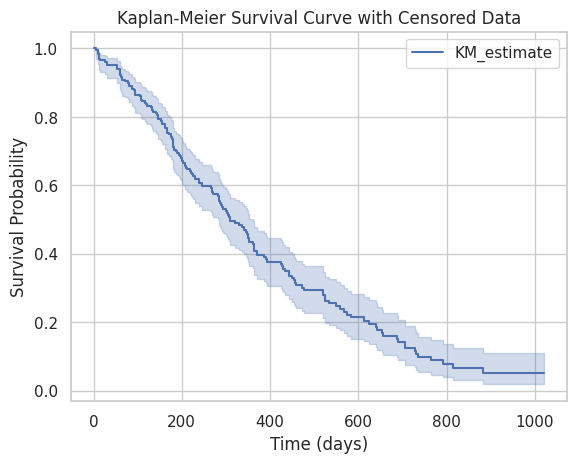

In [11]:
# Import necessary libraries
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the lung cancer dataset from lifelines
from lifelines.datasets import load_lung
df = load_lung()

# Display the first few rows of the dataset
print(df.head())

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the model on the lung cancer dataset
# Note: 'time' is the duration and 'status' is the event indicator
kmf.fit(durations=df['time'], event_observed=df['status'])

# Plot the survival function
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve with Censored Data')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.show()


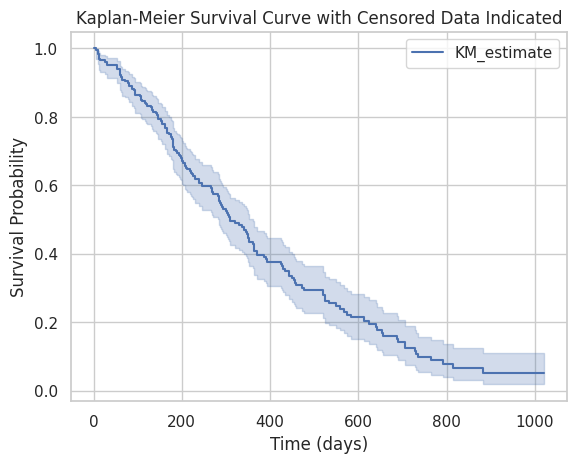

In [12]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the lung cancer dataset from lifelines
from lifelines.datasets import load_lung
df = load_lung()

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the model on the lung cancer dataset
kmf.fit(durations=df['time'], event_observed=df['status'])

# Plot the survival function, with censoring marks
ax = kmf.plot_survival_function(ci_show=True, censor_styles={'ms': 6, 'marker': '+'})
plt.title('Kaplan-Meier Survival Curve with Censored Data Indicated')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.show()


## Life table

In [13]:
# Import necessary libraries
import pandas as pd
from lifelines import KaplanMeierFitter, utils

# Load the lung cancer dataset from lifelines
from lifelines.datasets import load_lung
df = load_lung()

# Display the first few rows of the dataset
print(df.head())

# Use the lifelines utility to create a life table
# This function takes duration and event observed as inputs
life_table = utils.survival_table_from_events(
    df['time'],  # Time to event or censoring
    df['status'],  # Event occurred (1 if event happened, 0 if censored)
    birth_times=None,  # Assumed to be 0 if not specified
    intervals=[0, 180, 365, 540, 730]  # Custom intervals in days
)

# Display the life table
print("Life Table:")
print(life_table)


   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
0   3.0   306       1   74    1      1.0      90.0      100.0    1175.0   
1   3.0   455       1   68    1      0.0      90.0       90.0    1225.0   
2   3.0  1010       0   56    1      0.0      90.0       90.0       NaN   
3   5.0   210       1   57    1      1.0      90.0       60.0    1150.0   
4   1.0   883       1   60    1      0.0     100.0       90.0       NaN   

   wt.loss  
0      NaN  
1     15.0  
2     15.0  
3     11.0  
4      0.0  
Life Table:
                 removed  observed  censored  at_risk
event_at                                             
(-0.001, 180.0]       69        63         6      228
(180.0, 365.0]        94        58        36      159
(365.0, 540.0]        32        22        10       65
(540.0, 730.0]        20        16         4       33


In [18]:
228-69-94-32

33